# Classification of MNIST fashion dataset images using Multi layer Perceptrons

In this notebook, we have used MLP’s i.e. Multi-Layer Perceptrons as the neural network model to solve a classification problem. We have used PyTorch's API for creating and training MLPs for classification on the Fashion MNIST dataset.

Task – Classifying the images from MNIST fashion dataset into 10 different fashion classes (eg. Shirt, Dress, Shoe, etc)

## 1. Setting up source for initial data
Importing the initial Fashion MNIST dataset.

In [ ]:
import torch
import torchvision
from torch import nn
from torch.utils import data
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
from torchvision.transforms.functional import to_pil_image
from torchvision import transforms
import os
import json

Defining 4 utility functions

In [ ]:
def get_dataloader_workers():
    """Use 4 processes to read the data."""
    return 4

def load_data_fashion_mnist(batch_size, resize=None):
    """Download the Fashion-MNIST dataset and then load it into memory."""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(
        root="../data", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(
        root="../data", train=False, transform=trans, download=True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=get_dataloader_workers()),
            data.DataLoader(mnist_test, batch_size, shuffle=False,
                            num_workers=get_dataloader_workers()))
    
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

def use_svg_display():
    """Use the svg format to display a plot in Jupyter."""
    display.set_matplotlib_formats('svg')


## 2. Implementation
We create a batch size of 256

In [ ]:
#We have used cuda for computing using the GPU 
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Read training and test data
batch_size = 256
train_iter, test_iter = load_data_fashion_mnist(batch_size)


  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
X, y = next(iter(train_iter)) # first batch
print(X.size())
print(y)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


torch.Size([256, 1, 28, 28])
tensor([1, 7, 9, 5, 2, 9, 7, 1, 3, 8, 0, 8, 8, 0, 5, 4, 7, 7, 9, 3, 7, 8, 0, 8,
        7, 0, 3, 1, 7, 9, 3, 8, 5, 5, 9, 4, 2, 0, 4, 7, 6, 0, 5, 8, 5, 0, 8, 9,
        6, 5, 9, 5, 8, 0, 8, 5, 9, 3, 4, 9, 8, 7, 9, 8, 2, 8, 6, 0, 5, 7, 4, 1,
        6, 3, 8, 0, 1, 8, 8, 5, 4, 0, 2, 4, 6, 2, 8, 0, 5, 5, 9, 1, 7, 6, 7, 5,
        4, 4, 2, 2, 7, 5, 3, 5, 0, 8, 2, 8, 4, 2, 2, 9, 9, 3, 9, 0, 7, 1, 9, 0,
        4, 6, 9, 7, 1, 7, 2, 5, 6, 5, 3, 7, 3, 3, 1, 0, 3, 2, 0, 4, 2, 4, 2, 5,
        5, 3, 4, 6, 6, 6, 6, 4, 8, 1, 1, 5, 2, 7, 7, 7, 7, 0, 2, 1, 5, 2, 3, 0,
        6, 3, 5, 7, 1, 2, 1, 1, 1, 5, 6, 9, 8, 9, 6, 9, 7, 5, 1, 6, 2, 5, 1, 2,
        7, 0, 7, 8, 6, 6, 2, 9, 2, 5, 2, 2, 8, 0, 5, 5, 4, 0, 2, 5, 9, 7, 9, 5,
        6, 2, 5, 3, 0, 3, 3, 7, 5, 8, 2, 6, 7, 2, 5, 1, 7, 0, 8, 9, 1, 8, 1, 2,
        5, 7, 1, 8, 9, 1, 4, 0, 0, 6, 7, 0, 6, 4, 9, 6])


## 3. Defining the Model and Initialization

The model used in this problem consists of two main parts – the Stem and the Backbone.

The backbone consists of 1 block. In this block we have two MLP’s. We have used the RELU as the activation function for the layers in the MLP’s.
We initialize the model in the class ‘NET’. This class inherits functions from the parent class torch.nn.Module. The class Net has two functions, one is the constructor and another is the forward function.
a.	In the constructor, we define the layers present inside the MLP’s.
b.	The forward function is a member function. Through self it will have access to all the components of the constructor like the weights, bias and the layers that we defined in the constructor. This function shows how the model will use the input data to make predictions.
We use the Softmax regression function at the output in the forward function.
We also define a function called ‘init_weights’ to initialize the weights and bias.

In [ ]:
class Net(torch.nn.Module):
    def __init__(self, num_inputs, backbone_out, feat, num_outputs):
        super(Net, self).__init__()
        self.num_inputs = num_inputs
        self.num_outputs = num_outputs

        #In the Stem part, we receive an image of size 784 and divide it into non-overlapping patches of size 7
        self.Unfold = nn.Unfold(patch_size, padding=0, stride=patch_size)
        self.Stem = nn.Linear(num_inputs, feat)

        #The backbone consists of 1 block. In this block we have two MLP’s. 
        #We have used the RELU as the activation function for the layers in the MLP’s.

        self.bb1 = nn.Sequential (
            nn.Linear(feat, backbone_out),
            nn.ReLU(),
            nn.Linear(backbone_out,  feat)
        )
       
        self.bb2 = nn.Sequential(
            nn.Linear(16, backbone_out),
            nn.ReLU(),
            nn.Linear(backbone_out, feat)
        )

        #The following is the classifier that is used to put the images into individual classes
        self.classifier = nn.Linear(feat, num_outputs)

    def forward(self, x):
        x = self.Unfold(x)
        x = x.transpose(1,2) # print shape after unfold
        feat_matrix = self.Stem(x) # print feature matrix shape
        x = self.bb1(feat_matrix) # shape after backbone first part
        x = x.transpose(1,2) # shape after backbone first part transpose
        features = self.bb2(x) # shape after second part of backbone
        mean_value = torch.mean(features, 2) # shape after getting mean
        out = self.classifier(mean_value) # final shape
        
        return out 

## 4. Creating and initializing model
Defining number of inputs and number of outputs

In [ ]:
patch_size = 7
feat = 300
backbone_out = 256
num_inputs, num_outputs = patch_size*patch_size, 10
net = Net(num_inputs, backbone_out, feat,  num_outputs).to(device)

## 5. Initialization of Weights and Bias
We shall use the below function for initializing weights and bias because we have multiple layers of the same type. Hence weights and bias for all layers will be initialized in the same way.

In [ ]:
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.normal_(m.weight, std=0.01)
        torch.nn.init.zeros_(m.bias)

net.apply(init_weights)
print(net)

Net(
  (Unfold): Unfold(kernel_size=7, dilation=1, padding=0, stride=7)
  (Stem): Linear(in_features=49, out_features=300, bias=True)
  (bb1): Sequential(
    (0): Linear(in_features=300, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=300, bias=True)
  )
  (bb2): Sequential(
    (0): Linear(in_features=16, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=300, bias=True)
  )
  (classifier): Linear(in_features=300, out_features=10, bias=True)
)


## 6. Loss Function

We have used PyTorch's implementation of Softmax-Cross Entropy loss to avoid numerical instabilities

In [ ]:
# Creating the loss variable here. We shall use the Cross Entropy loss:
loss = nn.CrossEntropyLoss() 

## 7. Optimization Algorithm
Minibatch SGD (Stochastic Gradient Descent) has a learning rate lr and weight decay wd as the optimization algorithm.

In [ ]:
# Creting the optimizer here
optimizer = torch.optim.Adam(net.parameters(), lr=0.0022)

## 8. Evaluation
In this step we evaluate the accuracy of the model. We define the function ‘accuracy’ given below, that will compare the model predictions with the actual labels and calculate individual accuracies. 

In [ ]:
def accuracy(y_hat, y):  #y_hat is a matrix; 2nd dimension stores prediction scores for each class.
    """Compute the number of correct predictions."""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1) # Predicted class is the index of max score         
    cmp = (y_hat.type(y.dtype) == y)  # because`==` is sensitive to data types
    return float(torch.sum(cmp)) # Taking the sum yields the number of correct predictions.

Class ‘Accumulator’ will be used for accumulating sums over n variables.

In [ ]:
class Accumulator:  
    """For accumulating sums over `n` variables."""
    def __init__(self, n):
        self.data = [0.0] * n # [0, 0, ..., 0]
    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]
    def reset(self):
        self.data = [0.0] * len(self.data)
    def __getitem__(self, idx):
        return self.data[idx]

The below function evaluate_accuracy will iterate through all batches and record correct predictions from every batch.

In [ ]:
def evaluate_accuracy(net, data_iter): 
    """Compute the accuracy for a model on a dataset."""
    metric = Accumulator(2)  # No. of correct predictions, no. of predictions
    for _, (X, y) in enumerate(data_iter):
        X = X.to(device) # Loading batch dataset to GPU
        y = y.to(device) # Loading batch dataset to GPU
        metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

# 9. Defining the training function

The training loop for softmax regression is given below
  * 1. In the first step, we define a function to train for one epoch.

In [ ]:
def train_epoch_ch3(net, train_iter, loss, optimizer, batch_size=256, num_outputs=10):  
    """The training function for one epoch."""
    # Set the model to training mode
    if isinstance(net, torch.nn.Module):
        net.train()
    # Sum of training loss, sum of training accuracy, no. of examples
    metric = Accumulator(3)
    for X, y in train_iter:
        # Compute gradients and update parameters
        X = X.to(device) # Loading batch dataset to GPU
        y = y.to(device) # Loading batch dataset to GPU
        y_hat = net(X)
        l = loss(y_hat, y)
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
        metric.add(float(l) * len(y), accuracy(y_hat, y), y.size().numel())
    # Return training loss and training accuracy
    return metric[0] / metric[2], metric[1] / metric[2]

  * 2. In the second part, we create a code that will be used later for plotting a graph of training and validation accuracy as well as loss evolution over training loop 


In [ ]:
# Below code will be used for plotting data in animation.
class Animator:  
    """For plotting data in animation."""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(5, 5)):
      
        # Incrementally plotting multiple lines
        if legend is None:
            legend = []
        use_svg_display()
        self.fig, self.axes = plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
            
        # Using a lambda function to capture arguments
        self.config_axes = lambda: set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    # Save function used to save as image 
    def save_image(self, path):
      if not os.path.exists(path):
        os.mkdir(path)
      image_path = path + 'final_outcome.png'
      plt.savefig(image_path)

    def add(self, x, y):
        # Adding multiple data points into the figure
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

  * 3. The following function trains the model (`net`) on a training set (`train_iter`) for `num_epochs`.
* At the end of each epoch, the model is evaluated on a testing set (`test_iter`).
* `Animator` is used for visualizing the training progress.

In [ ]:
def train_ch3(net, train_iter, test_iter, loss, num_epochs, optimizer): 
    """Train a model."""
    final_outcome = {}
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.10, 1],
                        legend=['Training loss', 'Training accuracy', 'Testing accuracy'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, optimizer)
        test_acc = evaluate_accuracy(net, test_iter)

        # Recording final_outcome as dictionary
        final_outcome["epoch:"+str(epoch + 1)] = {"train acc":train_metrics[1], "test acc": test_acc, "train loss":train_metrics[0]} 
        print(final_outcome["epoch:"+str(epoch + 1)])
        animator.add(epoch + 1, train_metrics + (test_acc,))
        
    #Saving the accuracy and loss gragh 
    animator.save_image('./MNIST_fasion_final_outcome/')
    train_loss, train_acc = train_metrics
    print(final_outcome)
    return final_outcome

# 10. Model Training
We define the number of Epochs and plot a graph

{'epoch:1': {'train acc': 0.6223166666666666, 'test acc': 0.7206, 'train loss': 0.9763581983884175}, 'epoch:2': {'train acc': 0.7616333333333334, 'test acc': 0.7825, 'train loss': 0.6445956927935282}, 'epoch:3': {'train acc': 0.8031666666666667, 'test acc': 0.8129, 'train loss': 0.5474137503465016}, 'epoch:4': {'train acc': 0.8241333333333334, 'test acc': 0.8205, 'train loss': 0.4902645299911499}, 'epoch:5': {'train acc': 0.8377, 'test acc': 0.8267, 'train loss': 0.45503321817715964}, 'epoch:6': {'train acc': 0.8491666666666666, 'test acc': 0.8449, 'train loss': 0.42179804428418477}, 'epoch:7': {'train acc': 0.8591833333333333, 'test acc': 0.8489, 'train loss': 0.3938202107906342}, 'epoch:8': {'train acc': 0.8656333333333334, 'test acc': 0.8555, 'train loss': 0.3726401934146881}, 'epoch:9': {'train acc': 0.8741, 'test acc': 0.8605, 'train loss': 0.35237631090482074}, 'epoch:10': {'train acc': 0.87905, 'test acc': 0.865, 'train loss': 0.3361022217591604}, 'epoch:11': {'train acc': 0.882

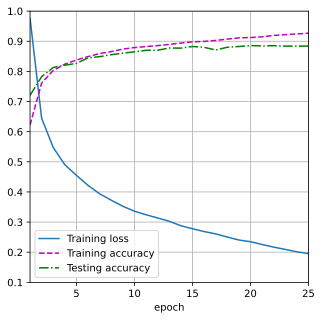

In [ ]:
num_epochs = 25
res = train_ch3(net, train_iter, test_iter, loss, num_epochs, optimizer)

with open('final_outcome.json', 'w') as fp:
    json.dump(res, fp)

In [ ]:
print('Final accuracy is ', + evaluate_accuracy(net, test_iter))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Final accuracy is  0.884


Hence we have achieved a final accuracy of 0.884 in classifying Fashion MNIST into multiple classes.